# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [13]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [14]:
#loading data
df = pd.read_csv('/Users/kali/Documents/GitHub/Machine_Learning_DataScience/adult.data')

In [15]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
df.shape

(32560, 15)

In [17]:
#checking data to see what i'm working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
#finding the count for each value
df.value_counts()

#cleaning data by dropping duplicate rows and columns
df.drop_duplicates(inplace=True)


In [19]:
#first attempt of trying to add column headers(cleaning data)
#ethnicity = ['White', 'white','Black','Black','White','Black','Black','White','White','White']
#df['Ethnicity'] = ethnicity

#the solution that actually worked to add column headers(cleaning data)
df.columns = ['age', 'workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
#checking to see if there are any null values(cleaning/data)
df1 = pd.isna(df).sum()
df1

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

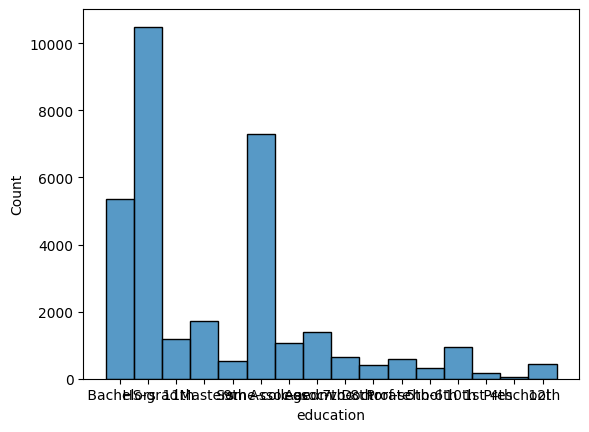

In [21]:
#plt.hist('Adult_Data', data=df); (use for regression models)
#gathering a summary statistic
sns.histplot(data=df, x='education');

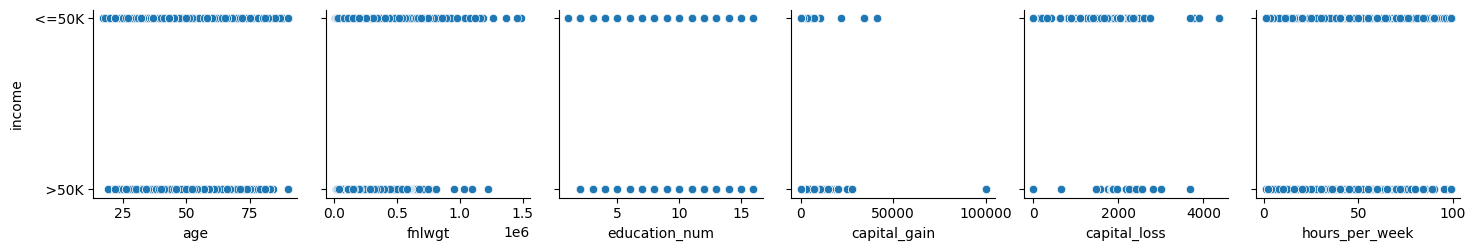

In [22]:
#how it looks in relation to the rset of my data
sns.pairplot(data=df, y_vars='income');  

In [33]:
#identify target vector
target = 'income'

#step 2: separate out the target vector
X = df.drop(columns = [target, 'education'])
y = df[target]

#step 3: split dataset
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

#Assert stsatement to make sure you arent going crazy
assert len(X_train) + len(X_test) == len(X), 'Data did not split correctly'

In [27]:
#establishing baseline
base = (df.income.value_counts(normalize=True)*100).round(2)[0] #indexing into the majority class wich is income less than 50k
#didn't need to set it to a value but did to put into an f string

#formating and predicting accuracy
print(f'Our baseline model can predict our majority class, .=50k for {base}% of the time!')

Our baseline model can predict our majority class, .=50k for 75.91% of the time!


/var/folders/9t/d7vqm7vd2dz91m11t5lqqbgw0000gn/T/ipykernel_44141/1833282556.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  base = (df.income.value_counts(normalize=True)*100).round(2)[0] #indexing into the majority class wich is income less than 50k


In [35]:
rf = RandomForestClassifier(OneHotEncoder,random_state=42)
rf.fit(X_train, y_train)

InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got <class 'category_encoders.one_hot.OneHotEncoder'> instead.

In [29]:
#boosted model:
xg=XGBClassifier()

#method 1:
labels = LabelEncoder()
labels.fit(y_train)
y_transformed = labels.transform(y_train)
y_transformed
xg.fit(X_train, y_transformed)

#method2, just a simplified way
xg.fit(X_train, LabelEncoder().fit_transform(y_train))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:463: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  or is_sparse(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:464: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or (is_categorical_dtype(dtype) and enable_categorical)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:workclass: object, education: object, marital_status: object, occupation: object, relationship: object, race: object, sex: object, native_country: object

In [36]:
#logistic regression
lr_pipe = make_pipeline(

    SimpleImputer(),
    OneHotEncoder(),  #onehotencoder is used when you have low cardonality: ordinalencoder for high cardinality
    LogisticRegression(random_state=42),
    )
lr_pipe.fit(X_train, y_train)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: ' Private'

In [31]:
#decision Tree:
dt = DecisionTreeClassifier(random_state=42)

#fit it:
dt.fit(X_train, y_train)

ValueError: could not convert string to float: ' Private'

In [32]:
#evaluate and check metrics by pulling out the score
print('Logistic Regression:')
print("Training Accuracy: {lr_pipe.score(x_training, y_training)*100}")
print("Testing Accuracy: {lr_pipe.score(x_test, y_test)*100}")
print("___________________________________")
print('Decision Tree Classifier:')
print("Training Accuracy: {dt.score(x_training, y_training)*100}")
print("Testing Accuracy: {dt.score(x_test, y_test)*100}")
print("__________________________")
print('xgboost Classifier:')
print("Training Accuracy: {xg.score(x_training, y_training)*100}")
print("Testing Accuracy: {xg.score(x_test, y_test)*100}")
print("____________________________________")
print('Random Forest Classifer:')
print("Training Accuracy: {rf.score(x_training, y_training)*100}")
print("Testing Accuracy: {rf.score(x_test, y_test)*100}")

Logistic Regression:
Training Accuracy: {lr_pipe.score(x_training, y_training)*100}
Testing Accuracy: {lr_pipe.score(x_test, y_test)*100}
___________________________________
Decision Tree Classifier:
Training Accuracy: {dt.score(x_training, y_training)*100}
Testing Accuracy: {dt.score(x_test, y_test)*100}
__________________________
xgboost Classifier:
Training Accuracy: {xg.score(x_training, y_training)*100}
Testing Accuracy: {xg.score(x_test, y_test)*100}
____________________________________
Random Forest Classifer:
Training Accuracy: {rf.score(x_training, y_training)*100}
Testing Accuracy: {rf.score(x_test, y_test)*100}


In [37]:
#wrap in roc_auc_score

print('Logistic Regression:')
print("Training Accuracy: {roc_ac_score(lr_pipe.predict_proba(x_train), multi_class='ovr')*100}")
print("Testing Accuracy: {roc_auc_scorelr_pipe.predict_proba(x_train), multi_class='ovr')*100}")
print("___________________________________")
print('Decision Tree Classifier:')
print("Training Accuracy: {dt.predict_proba(x_train), multi_class='ovr')*100}")
print("Testing Accuracy: {dt.predict_proba(x_train), multi_class='ovr')*100}")
print("__________________________")
print('xgboost Classifier:')
print("Training Accuracy: {xg.predict_proba(x_train), multi_class='ovr')*100}")
print("Testing Accuracy: {xg.predict_proba(x_train), multi_class='ovr')*100}")
print("____________________________________")
print('Random Forest Classifer:')
print("Training Accuracy: {rf.predict_proba(x_train), multi_class='ovr')*100}")
print("Testing Accuracy: {rf.predict_proba(x_train), multi_class='ovr')*100}")

Logistic Regression:
Training Accuracy: {roc_ac_score(lr_pipe.predict_proba(x_train), multi_class='ovr')*100}
Testing Accuracy: {roc_auc_scorelr_pipe.predict_proba(x_train), multi_class='ovr')*100}
___________________________________
Decision Tree Classifier:
Training Accuracy: {dt.predict_proba(x_train), multi_class='ovr')*100}
Testing Accuracy: {dt.predict_proba(x_train), multi_class='ovr')*100}
__________________________
xgboost Classifier:
Training Accuracy: {xg.predict_proba(x_train), multi_class='ovr')*100}
Testing Accuracy: {xg.predict_proba(x_train), multi_class='ovr')*100}
____________________________________
Random Forest Classifer:
Training Accuracy: {rf.predict_proba(x_train), multi_class='ovr')*100}
Testing Accuracy: {rf.predict_proba(x_train), multi_class='ovr')*100}


In [43]:
#must index into the pipeline
lr_pipe.steps[0][1].coef_

pipe_log.named

AttributeError: 'SimpleImputer' object has no attribute 'coef_'

In [42]:
#communicating the results
coefficents = lr_pipe.steps[0][1].coef_
features = lr_pipe.feature_names_in_

print(features)
print(coefficents)

feat_imp = pd.Series(coefficents[0], index = features).sort_values(key=abs)
feat_imp.tail().plot.barh

AttributeError: 'SimpleImputer' object has no attribute 'coef_'

In [46]:
#tuning the model

param_grid = {
    "logisticregression__c": np.arrange(0.1,2.0,.2)
}

clf = RandomizedSearchCV(param_grid, lr_pipe)
clf.fit(X_train, y_train)

AttributeError: module 'numpy' has no attribute 'arrange'

In [ ]:
clf.best_estimator_.best_params_

